In [562]:
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

### Import Data

In [563]:
house_df = pd.read_csv("00_Challenges_Data/house-votes-84.data.txt",header=None)

In [564]:
house_df = house_df.rename({0:"party"},axis=1)
house_df.head()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [565]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party    435 non-null object
1        435 non-null object
2        435 non-null object
3        435 non-null object
4        435 non-null object
5        435 non-null object
6        435 non-null object
7        435 non-null object
8        435 non-null object
9        435 non-null object
10       435 non-null object
11       435 non-null object
12       435 non-null object
13       435 non-null object
14       435 non-null object
15       435 non-null object
16       435 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [566]:
house_df.describe()

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


### Challenge 1
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [567]:
house_df = house_df.replace({'y':1,'n':0,'?':np.nan})

In [568]:
col_mean = [0] + house_df.describe().loc["mean"]        #create a list of the column means

for col in house_df.columns[1:]:                        #loop through each column and replace NA with the mean
    house_df[col] = house_df[col].fillna(col_mean[col])

In [569]:
house_df.head(5)

,party,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


### Challenge 2
Split the data into a test and training set. Use this function:

from sklearn.cross_validation import train_test_split

In [570]:
from sklearn.cross_validation import train_test_split

In [571]:
X = house_df.iloc[:,1:]   #set X equal to the features/voting records
y = house_df.loc[:,"party"]    #set y target to the party classification

In [572]:
y.head()

0    republican
1    republican
2      democrat
3      democrat
4      democrat
Name: party, dtype: object

In [573]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [574]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

### Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

from sklearn.neighbors import KNeighborsClassifier
Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

from sklearn.metrics import accuracy_score
Which k value gives the highest accuracy?

In [575]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [576]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    print(round(accuracy_score(y_test, y_pred_knn),3),"N=", i)

0.901 N= 1
0.893 N= 2
0.901 N= 3
0.901 N= 4
0.916 N= 5
0.931 N= 6
0.916 N= 7
0.924 N= 8
0.931 N= 9
0.931 N= 10
0.924 N= 11
0.924 N= 12
0.924 N= 13
0.924 N= 14
0.924 N= 15
0.924 N= 16
0.924 N= 17
0.916 N= 18
0.916 N= 19
0.916 N= 20


### Challenge 4
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [577]:
from sklearn.linear_model import LogisticRegression

In [578]:
lgmodel = LogisticRegression(C=1000)
lgmodel.fit(X_train,y_train)
y_pred_logistic = lgmodel.predict(X_test)
logistic_score = round(accuracy_score(y_test, y_pred_logistic),3)
print(logistic_score)

0.931


### Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [579]:
republican_count = len(house_df[house_df["party"] == 'republican'])
democrat_count = len(house_df[house_df["party"] == 'democrat'])

<BarContainer object of 2 artists>

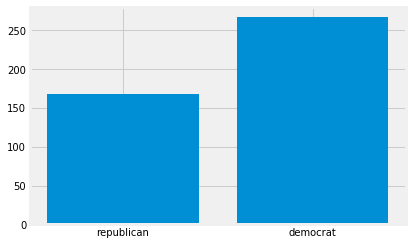

In [580]:
plt.bar(["republican",'democrat'],[republican_count,democrat_count])

In [581]:
def only_dem(dataframe):
    return np.asarray(["democrat"] * len(dataframe))    #return an array

def only_repub(dataframe):
    return np.asarray(["republican"] * len(dataframe))

In [582]:
y_pred_dem = only_dem(X_test)
dem_score = round(accuracy_score(y_test, y_pred_dem),3)
print(dem_score)

0.588


In [583]:
y_pred_repub = only_repub(X_test)
repub_score = round(accuracy_score(y_test, y_pred_repub),3)
print(repub_score)

0.412


### Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [584]:
# search for an optimal value of K for KNN
k_range = list(range(1, 21))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    scores = round(accuracy_score(y_test, y_pred_knn),3)
    k_scores.append(scores.mean())
print(k_scores)

[0.901, 0.893, 0.901, 0.901, 0.916, 0.931, 0.916, 0.924, 0.931, 0.931, 0.924, 0.924, 0.924, 0.924, 0.924, 0.924, 0.924, 0.916, 0.916, 0.916]


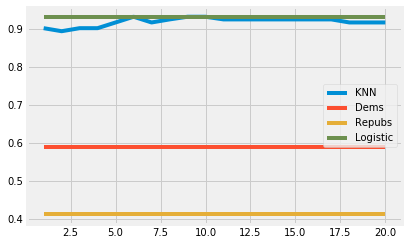

In [585]:
plt.plot(k_range, k_scores, label='KNN')
plt.plot(k_range, [dem_score] * len(k_range), label='Dems')
plt.plot(k_range, [repub_score] * len(k_range), label='Repubs')
plt.plot(k_range, [logistic_score] * len(k_range), label='Logistic')
plt.legend();

### Challenge 7
Plot a learning curve for the logistic regression model. 

In [586]:
from sklearn.learning_curve import learning_curve

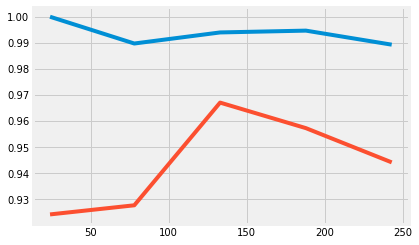

In [587]:
lgmodel = LogisticRegression(C=1000)
m, train_err, ts_err = learning_curve(lgmodel,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err);

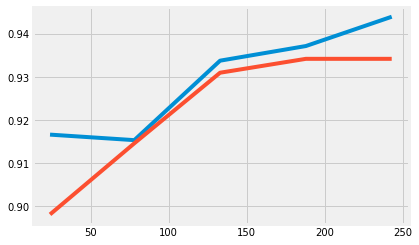

In [588]:
knn = KNeighborsClassifier(n_neighbors=10)
m, train_err, ts_err = learning_curve(knn,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err)

### Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

In [589]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [590]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
y_pred_gnb = gnb_model.predict(X_test)
gnb_score = round(accuracy_score(y_test, y_pred_gnb),3)
print(gnb_score)

0.939


In [591]:
# SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC

In [592]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_pred_svc = svc_model.predict(X_test)
svc_score = round(accuracy_score(y_test, y_pred_svc),3)
print(svc_score)

0.954


In [593]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [594]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)
y_pred_dtree = dtree_model.predict(X_test)
dtree_score = round(accuracy_score(y_test, y_pred_dtree),3)
print(dtree_score)

0.947


In [595]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [596]:
rforest_model = RandomForestClassifier()
rforest_model.fit(X_train,y_train)
y_pred_rforest = rforest_model.predict(X_test)
rforest_score = round(accuracy_score(y_test, y_pred_rforest),3)
print(rforest_score)

0.939


### Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yoursel

In [597]:
from sklearn.cross_validation import cross_val_score

In [598]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_cv = cross_val_score(gnb_model,X_train,y_train,cv=5,scoring='accuracy')
print(gnb_cv.mean())

0.9211475409836065


In [599]:
# SVM (Support Vector Machine) Classifier
svc_model = SVC()
svc_cv = cross_val_score(svc_model,X_train,y_train,cv=5,scoring='accuracy')
print(svc_cv.mean())

0.9606010928961748


In [600]:
# Decision Tree
dtree_model = DecisionTreeClassifier()
dtree_cv = cross_val_score(dtree_model,X_train,y_train,cv=5,scoring='accuracy')
print(dtree_cv.mean())

0.9474863387978141


In [601]:
# Random Forest
rforest_model = RandomForestClassifier()
rforest_cv = cross_val_score(rforest_model,X_train,y_train,cv=5,scoring='accuracy')
print(rforest_cv.mean())

0.9474863387978141


### Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

#### Load Data

In [602]:
house_df = pd.read_csv("00_Challenges_Data/house-votes-84.data.txt",header=None)
house_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [603]:
house_df = house_df.replace({'y':1,'n':0,'?':np.nan})
house_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [604]:
house_df = house_df[house_df[1].notna()]   #I will predict column 1, so remove any nulls in that column

#### Split into Target & Features, replace NAs with Mode, Test/Train split

In [605]:
X = house_df.loc[:,2:]
y = house_df.loc[:,1]

In [606]:
X.head(5)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
3,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [607]:
X.mode()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


In [608]:
X_mode = X.mode()
for col in X.columns:  #loop through each column and replace NA with the mean
    X[col] = X[col].fillna(X_mode[col][0])

In [609]:
X.head(5)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
5,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [610]:
#hold out 30% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=4444) 

#### KNN Model CV

In [611]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    print(round(knn_cv.mean(),4), "K: ", i)

0.6321 K:  1
0.6488 K:  2
0.6826 K:  3
0.6655 K:  4
0.6861 K:  5
0.6891 K:  6
0.6858 K:  7
0.6959 K:  8
0.6689 K:  9
0.6925 K:  10
0.6823 K:  11
0.6789 K:  12
0.6721 K:  13
0.6823 K:  14
0.6925 K:  15
0.6822 K:  16
0.7025 K:  17
0.6925 K:  18
0.6991 K:  19
0.6926 K:  20


#### Logistic Model CV

In [612]:
lgmodel = LogisticRegression(C=1000)
lgmodel_cv = cross_val_score(lgmodel,X_train,y_train,cv=5,scoring='accuracy')
print(lgmodel_cv.mean())

0.6991155269822716


In [613]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    print(round(accuracy_score(y_test, y_pred_knn),3),"N=", i)

0.654 N= 1
0.646 N= 2
0.654 N= 3
0.693 N= 4
0.661 N= 5
0.677 N= 6
0.685 N= 7
0.701 N= 8
0.709 N= 9
0.685 N= 10
0.685 N= 11
0.669 N= 12
0.669 N= 13
0.654 N= 14
0.669 N= 15
0.685 N= 16
0.677 N= 17
0.661 N= 18
0.654 N= 19
0.646 N= 20


In [614]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(round(accuracy_score(y_test, y_pred_knn),3),"N=", i)

0.709 N= 20


In [615]:
knn_cv = cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print(knn_cv.mean())

0.6688895382817066


### Challenge 11

Back to movie data! Choose one categoric feature to predict. 

In [616]:
movie_df = pd.read_csv('/Users/dhui/Dropbox/Metis/01_Github/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [617]:
movie_df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [618]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 5.5+ KB


In [619]:
movie_df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [620]:
#replace missing budget numbers with median values 
median_movie_budget = movie_df.describe()["Budget"]["50%"]
movie_df["Budget"] = movie_df["Budget"].fillna(median_movie_budget)

In [621]:
y = movie_df["Rating"]

In [622]:
X = movie_df[["Budget","DomesticTotalGross","Runtime"]]

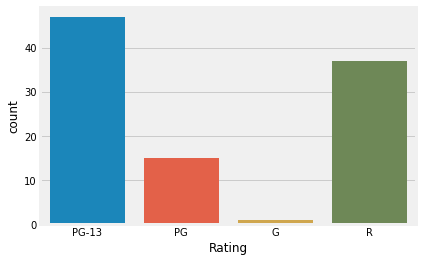

In [623]:
import seaborn as sns
sns.countplot(y);

In [624]:
#hold out 25% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4444) 

#### KNN Model

In [625]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    print(round(accuracy_score(y_test, y_pred_knn),3),"N=", i)

0.56 N= 1
0.52 N= 2
0.6 N= 3
0.52 N= 4
0.64 N= 5
0.52 N= 6
0.52 N= 7
0.56 N= 8
0.56 N= 9
0.56 N= 10
0.56 N= 11
0.52 N= 12
0.56 N= 13
0.48 N= 14
0.48 N= 15
0.48 N= 16
0.48 N= 17
0.48 N= 18
0.48 N= 19
0.48 N= 20


#### Logistic Model

In [636]:
lgmodel = LogisticRegression(C=100000)
lgmodel.fit(X_train,y_train)
y_pred_logistic = lgmodel.predict(X_test)
logistic_score = round(accuracy_score(y_test, y_pred_logistic),5)
print(logistic_score)

0.52


#### Just Guess PG-13

In [637]:
y_pred_pg_13 = ["PG-13"] * len(y_test)
print(round(accuracy_score(y_test, y_pred_knn),3))

0.48


Q: How much better do KNN and logistic regression do versus the baseline?
A: 9% better

In [643]:
lgmodel.coef_

array([[-1.19719470e-07,  7.24544949e-09, -3.42986425e-12],
       [-4.04789886e-09, -9.75684346e-09, -1.79357315e-13],
       [ 5.97769547e-09, -3.99173827e-09, -3.46398675e-14],
       [-1.34711043e-08,  2.13921348e-09,  1.00392609e-13]])

### Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

In [647]:
health_df = pd.read_csv("00_Challenges_Data/haberman.data.txt",header=None)
health_df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [651]:
health_df = health_df.rename({0:'age',1:'surgery_year',2:'nodes',3:'status'},axis=1)

In [657]:
health_df.describe()

,age,surgery_year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### What is the average and standard deviation of the age of all of the patients?

In [658]:
health_df["age"].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

#### What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [659]:
health_df["age"][health_df["status"] == 1].describe()

count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

#### What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [660]:
health_df["age"][health_df["status"] == 2].describe()

count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

#### Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

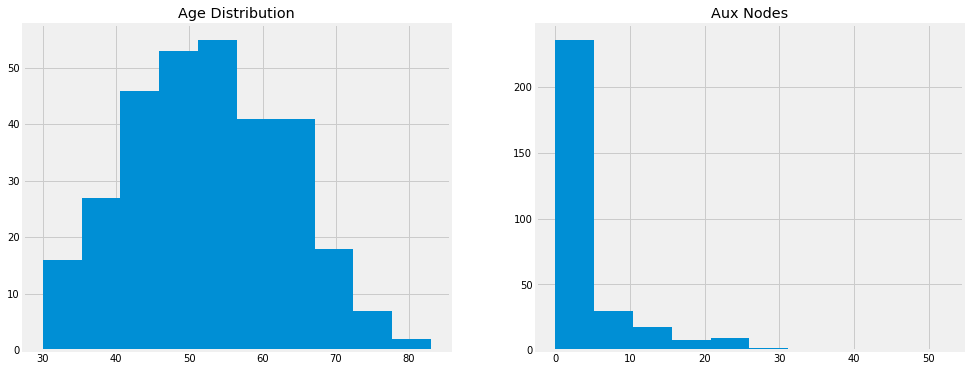

In [667]:
plt.figure(figsize=[15,6])

plt.subplot(1,2,1)
plt.title('Age Distribution')
plt.hist(health_df["age"])

plt.subplot(1,2,2)
plt.title('Aux Nodes')
plt.hist(health_df["nodes"]); 

#### What is the earliest year of surgery in this dataset? What is the most recent year of surgery?

In [670]:
health_df["surgery_year"].describe()

count    306.000000
mean      62.852941
std        3.249405
min       58.000000
25%       60.000000
50%       63.000000
75%       65.750000
max       69.000000
Name: surgery_year, dtype: float64

#### Use logistic regression to predict survival after 5 years. How well does your model do?

In [672]:
X = health_df[["age","surgery_year","nodes"]]
y = health_df["status"]

In [673]:
#hold out 25% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=4444) 

In [674]:
lgmodel = LogisticRegression(C=100000)
lgmodel.fit(X_train,y_train)
y_pred_logistic = lgmodel.predict(X_test)
logistic_score = round(accuracy_score(y_test, y_pred_logistic),5)
print(logistic_score)

0.84416


#### What are the coefficients of logistic regression? Which features affect the outcome how?

In [675]:
lgmodel.coef_

array([[0.01573536, 0.00341949, 0.07633706]])

In [676]:
#Nodes

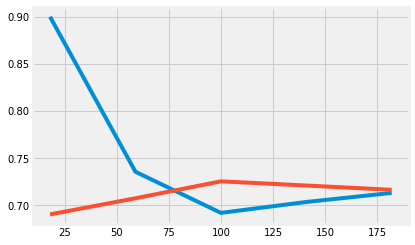

In [677]:
m, train_err, ts_err = learning_curve(lgmodel,X_train,y_train,cv=5)
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
plt.plot(m, train_cv_err)
plt.plot(m, test_cv_err);